# Proyek Analisis Data: Bike Sharing 
- **Nama:** I Gede Agus Subawa
- **Email:** subawa116@gmail.com
- **ID Dicoding:** *******ss

## Menentukan Pertanyaan Bisnis

- Apa musim favorit atau populer dalam penyewaan sepeda?
- Bagaimana pola tren penggunaan sepeda di tahun 2011?
- Apa cuaca favorit untuk para penyewa sepeda?
- Dari tipe penyewa, manakah yang lebih dominan antara penyewa casual dengan teregister?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [21]:
#Load data day.csv
data_day = pd.read_csv('data\day.csv')

In [22]:
#Menampilkan data 5 teratas
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [27]:
#Melihat tipe data day.csv
print(data_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [28]:
#Mengecek missing values dan duplikasi data
print(f"Jumlah duplikat data: {data_day.duplicated().sum()}")
print("\nJumlah missing values")
print(data_day.isnull().sum())

Jumlah duplikat data: 0

Jumlah missing values
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
#Melihat statistik deskriptif dari data day.csv
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset tidak memiliki nilai yang hilang dan tidak ada data yang duplikat
- Adanya tipe data yang tidak sesuai yaitu dteday. Seharusnya datetime

### Cleaning Data

Mengubah tipe data kolom dteday

In [3]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah nilai di beberapa kolom

Adanya nilai kolom yang berupa angka untuk data kategorikal seperti season, mnth, dan lainnya untuk mempermudah analisis

In [4]:
#simpan nama musim
nama_musim = {
    1:'Spring',
    2:'Summer',
    3:"Fall",
    4:"Winter"
}

#simpan nama cuaca
nama_cuaca = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

# simpan nama bulan
nama_bulan = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


data_day['season'] = data_day['season'].map(nama_musim)
data_day['mnth'] = data_day['mnth'].map(nama_bulan)
data_day['weathersit'] = data_day['weathersit'].map(nama_cuaca)

data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,Jan,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore day.csv

#### Melihat rata-rata, tertinggi, terendah, dan jumlah penyewa di tiap musim

In [32]:
data_day.groupby('season')['cnt'].agg(['mean', 'sum', 'min', 'max'])

,mean,sum,min,max
season,,,,
Fall,5644.303191,1061129,1115,8714
Spring,2604.132597,471348,431,7836
Summer,4992.331522,918589,795,8362
Winter,4728.162921,841613,22,8555


#### Melihat rata-rata dari temperatur, kelembaban, dan kecepatan angin di tiap musim

In [33]:
data_day.groupby('season')[['temp', 'hum', 'windspeed']].mean()

,temp,hum,windspeed
season,,,
Fall,0.706309,0.633482,0.172095
Spring,0.297748,0.582903,0.214537
Summer,0.544405,0.626948,0.203507
Winter,0.422906,0.668719,0.171995


#### Melihat rata-rata, tertinggi, terendah, dan jumlah penyewa di tiap kondisi cuaca

In [34]:
#Melihat statistik deksriptif dari jumlah penyewaan berdasarkan weathersit
data_day.groupby('weathersit')['cnt'].agg(['mean', 'sum', 'min', 'max'])

,mean,sum,min,max
weathersit,,,,
Clear/Partly Cloudy,4876.786177,2257952,431,8714
Light Snow/Rain,1803.285714,37869,22,4639
Misty/Cloudy,4035.862348,996858,605,8362


#### Korelasi antara temperatur, kelembaban, dan kecepatan angin dengan jumlah penyewa

In [38]:
#Melihat korelasi
data_day[['temp','windspeed','hum','cnt']].corr()

,temp,windspeed,hum,cnt
temp,1.000000,-0.157944,0.126963,0.627494
windspeed,-0.157944,1.000000,-0.248489,-0.234545
hum,0.126963,-0.248489,1.000000,-0.100659
cnt,0.627494,-0.234545,-0.100659,1.000000


#### **Insight:**
- Jumlah penyewa terbanyak terjadi pada musim gugur dengan rata-rata jumlah penyewa 5644. Kemungkinan karena kondisi cuaca yang optimal untuk bersepeda (suhu yang stabil dan optimal). Musim dingin mencatatkan rata-rata jumlah penyewaan sepeda yang lebih tinggi dibandingkan musim semi. Ini merupakan temuan yang menarik karena umumnya musim dingin diharapkan memiliki jumlah penyewa terendah karena cuaca yang kurang optimal untuk bersepeda. 

- Berdasarkan temperature (rata-rata), musim dengan temperatur yang hangat (terjadi pada musim gugur dan panas) cenderung meningkatkan jumlah penyewaan. Musim gugur tidak hanya populer untuk bersepeda (temperatur yang optimal), tetapi juga menunjukkan bahwa cuaca yang terlalu panas atau terlalu dingin dapat mengurangi kenyamanan penggunaan sepeda

- Jumlah penyewaan sepeda paling tinggi terjadi pada kondisi cuaca cerah (Clear/Partly Cloudy) yang menunjukkan kondisi cuaca tersebut cukup baik untuk meningkatkan minat dan frekuensi penyewaan sepeda. Kondisi cuaca Light Snow/Rain cenderung menurun secara signifikan dan memiliki dampak untuk mengurangi minat orang bersepeda. 

- Berdasarkan nilai korelasi antara temperatur, kelembaban, dan kecepatan angin dengan jumlah penyewaan didapatka kesimpulan sebagai berikut:
    * Temperatur memiliki korelasi positif yang kuat dengan jumlah penyewaan. Temperatur yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda. 
    * Kelembaban memiliki korelasi negatif yang sangat rendah dan menunjukkan bahwa peningkatan kelembaban tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda. 
    * Kecepatan angin juga menunjukkan korelasi negatif yang rendah yang menunjukkan peningkatan kecepatan angin sedikit menurunkan jumlah penyewaan sepeda. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa musim favorit atau populer dalam penyewaan sepeda?

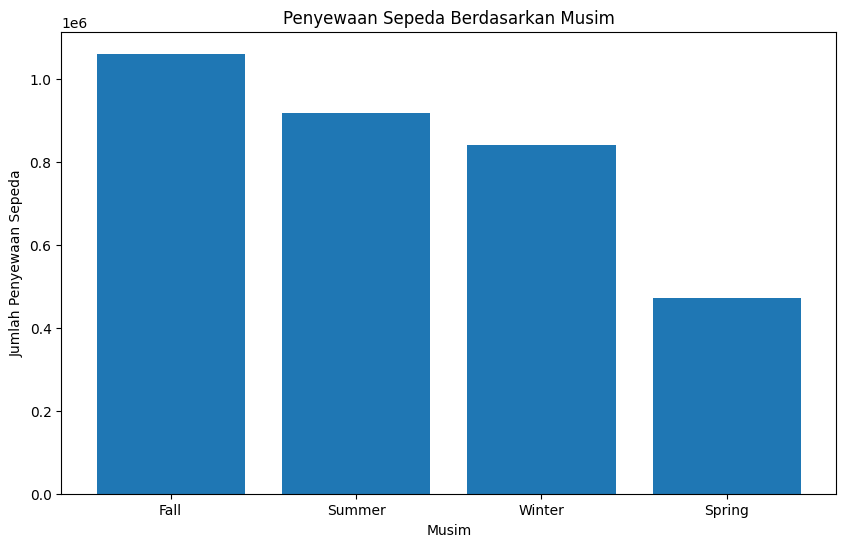

In [44]:
# Mengelompokkan berdasarkan musim dan menghitung total penyewaan
season_trends = data_day.groupby('season')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

#Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(season_trends['season'], season_trends['cnt'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.show()

### Pertanyaan 2: Bagaimana pola tren penggunaan sepeda di tahun 2011?

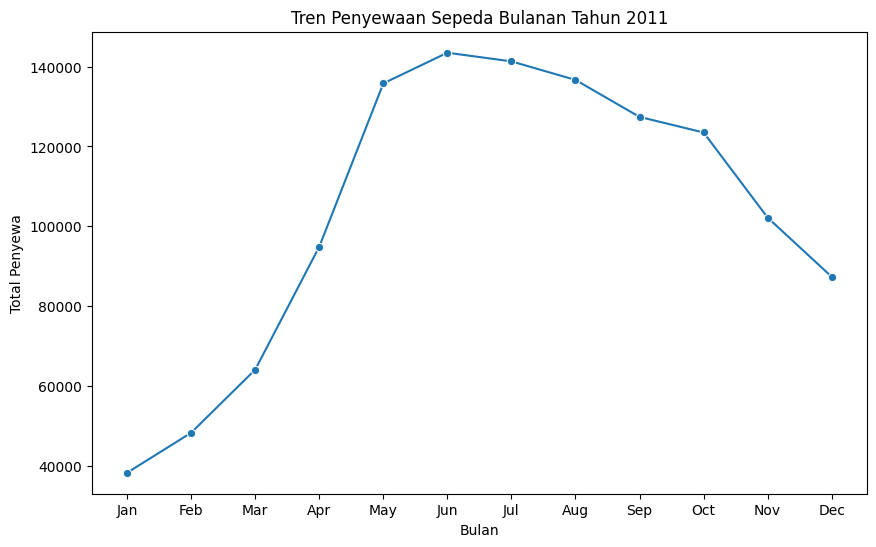

In [48]:
# Memfilter data untuk tahun 2011 saja
data_2011 = data_day[data_day['yr'] == 0]

monthly_data = data_2011.groupby('mnth')['cnt'].sum().reset_index()


# Membuat lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x='mnth', y='cnt', marker='o')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewa')
plt.title('Tren Penyewaan Sepeda Bulanan Tahun 2011')
plt.show()

### Pertanyaan 3: Apa cuaca favorit untuk para penyewa sepeda?

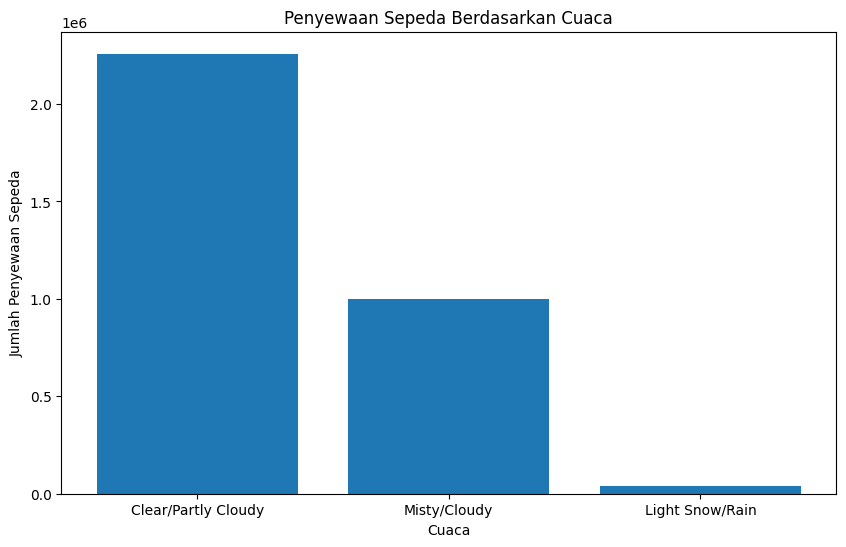

In [39]:
# Mengelompokkan berdasarkan musim dan menghitung total penyewaan
cuaca_distri = data_day.groupby('weathersit')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

#Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(cuaca_distri['weathersit'], cuaca_distri['cnt'])
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

### Pertanyaan 4: Dari tipe penyewa, manakah yang lebih dominan antara penyewa casual dengan teregister?

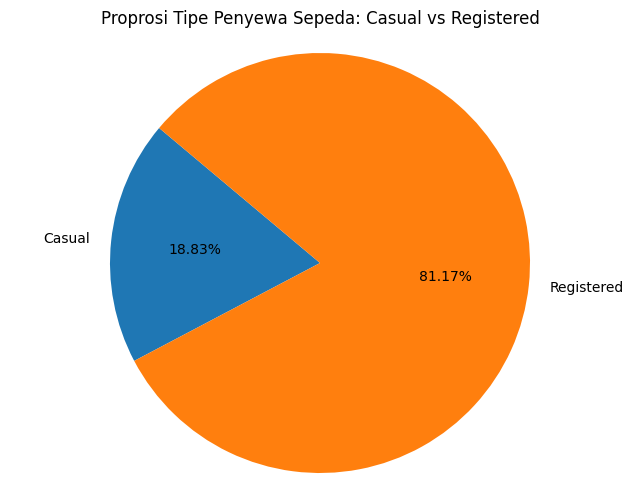

In [49]:
# Hitung jumlah penyewa berdasarkan tipe
casual_count = data_day['casual'].sum()
registered_count = data_day['registered'].sum()

# Buat DataFrame baru untuk proporsi
user_type_counts = pd.Series([casual_count, registered_count], index=['Casual', 'Registered'])

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Proprosi Tipe Penyewa Sepeda: Casual vs Registered')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

## Conclusion

- Kesimpulan pertanyan 1: Musim favorit dalam penyewaan sepeda terjadi pada musim fall (gugur) yang kemungkinan besar karena kondisi cuaca atau suhu yang optimal untuk bersepeda. Dengan rata-rata suhu sebesar 0.7063, musim gugur menawarkan kondisi yang hangat dan mendukung aktivitas luar ruangan seperti bersepeda. 

- Kesimpulan pertanyaan 2: Tren penyewaan sepeda di tahun 2011 menunjukkan puncak tertinggi pada bulan Juni yang menandakan bahwa bulan tersebut sebagai waktu yang populer untuk bersepeda. Adanya peningkatan jumlah yang cukup signifikan dari bulan April ke Mei yang menunjukkan adanya minat terhadap penggunaan sepeda. Namun, setelah bulan Juni terjadi penurunan yang signifikan dalam penyewaan sepeda yang mungkin disebabkan kondisi cuaca yang membuat bersepeda menjadi kurang nyaman.
- Kesimpulan pertanyaan 3: Cuaca cerah berawan menjadi favorit bagi penyewa sepeda dibandingkan dengan kondisi kabut dan hujan ringan. Hal ini menunjukkan bahwa cuaca cerah lebih menarik untuk kegiatan luar ruangan dan memberikan pengalaman bersepeda yang nyaman. Kondisi cuaca yang kurang ideal seperti kabut dan hujan berkontribusi pada penurunan minat terhadap penyewaan sepeda. 
- Kesimpulan pertanyaan 4: Sebagian besar penyewa merupakan pengguna teregister (registered) dengan proporsi mencapai 81.17% dibandingkan dengan casual yang hanya 18.83% . Ini menunjukkan bahwa mayoritas penyewa merupakan yang terdaftar atau melakukan pendaftaran yang mungkin dipengaruhi oleh kemudahan dalam menggunakan layanan. Penyewa casual tetap penting untuk mendukung pertumbuhan penyewaan sepeda dan dapat melakukan strategi pemasaran dengan menargetkan penyewa casual agar menjadi pengguna terdaftar. 